In [2]:
# coding: utf-8

import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt


# Load the diabetes data set.
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [4]:
# Use only one feature.
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [6]:
# Create the linear-regression object.
regr_linear = linear_model.LinearRegression()
regr_Lasso = linear_model.Lasso(alpha=0.1)
regr_Ridge = linear_model.Ridge(alpha=0.1)

In [8]:
# Train the model using the training set.
regr_linear.fit(diabetes_X, diabetes_y)
regr_Lasso.fit(diabetes_X, diabetes_y)
regr_Ridge.fit(diabetes_X, diabetes_y);

In [10]:
# Get the resulting coefficients.
print("linear coefficients: \n", regr_linear.coef_)
print("linear intercept: \n", regr_linear.intercept_)
print("LASSO coefficients: \n", regr_Lasso.coef_)
print("LASSO intercept: \n", regr_Lasso.intercept_)
print("ridge coefficients: \n", regr_Ridge.coef_)
print("ridge intercept: \n", regr_Ridge.intercept_)

linear coefficients: 
 [949.43526038]
linear intercept: 
 152.13348416289617
LASSO coefficients: 
 [905.23526038]
LASSO intercept: 
 152.13348416289614
ridge coefficients: 
 [863.12296399]
ridge intercept: 
 152.13348416289614


In [12]:
# Get the coefficients and intercepts for plain old linear regression.
lin_coefficients = regr_linear.coef_
lin_intercept = regr_linear.intercept_

# Construct the equation string.
equation = f"y = {lin_intercept:.2f}"
for i, coef in enumerate(lin_coefficients):
    equation += f" + {coef:.2f} * x{i+1}"

print(equation)


# Get the coefficients and intercepts for LASSO-regularized linear regression.
las_coefficients = regr_Lasso.coef_
las_intercept = regr_Lasso.intercept_

# Construct the equation string.
equation = f"y = {las_intercept:.2f}"
for i, coef in enumerate(las_coefficients):
    equation += f" + {coef:.2f} * x{i+1}"

print(equation)


# Get the coefficients and intercepts for ridge-regularized linear regression.
rid_coefficients = regr_Ridge.coef_
rid_intercept = regr_Ridge.intercept_

# Construct the equation string.
equation = f"y = {rid_intercept:.2f}"
for i, coef in enumerate(rid_coefficients):
    equation += f" + {coef:.2f} * x{i+1}"

print(equation)

y = 152.13 + 949.44 * x1
y = 152.13 + 905.24 * x1
y = 152.13 + 863.12 * x1


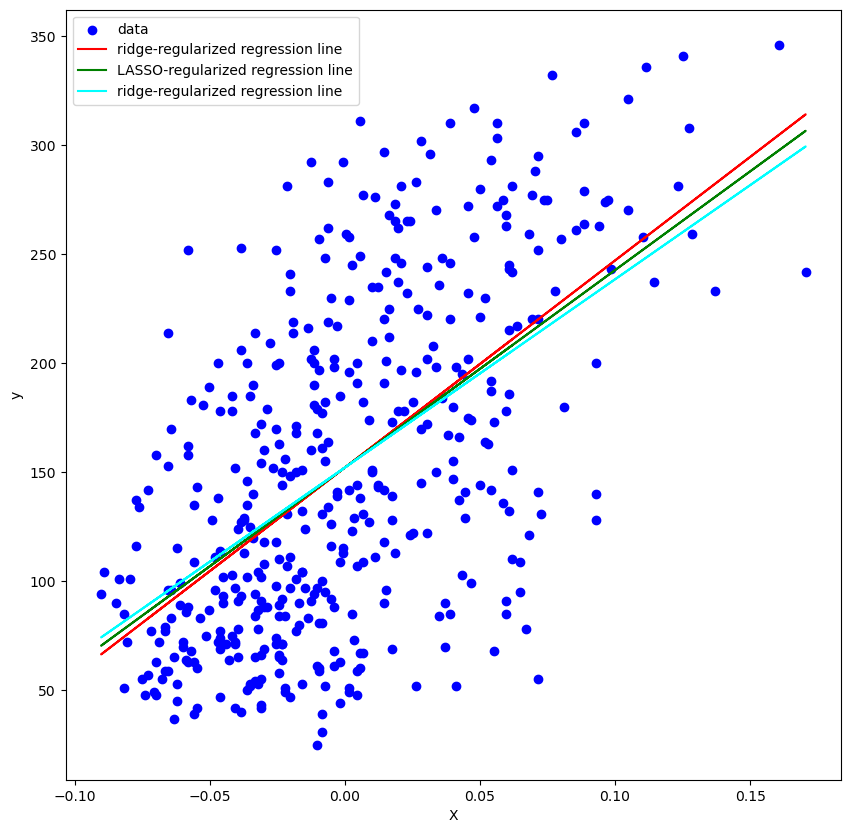

In [14]:
# Generate predictions with each option.
y_pred = regr_linear.predict(diabetes_X)
y_L_pred = regr_Lasso.predict(diabetes_X)
y_r_pred = regr_Ridge.predict(diabetes_X)

# Plot the data points and the regression line.
plt.figure(figsize=(10, 10))  # 10" by 10"
plt.scatter(diabetes_X, diabetes_y, color='blue', label='data')
plt.plot(diabetes_X, y_pred, color='red', label='ridge-regularized regression line')
plt.plot(diabetes_X, y_L_pred, color='green', label='LASSO-regularized regression line')
plt.plot(diabetes_X, y_r_pred, color='cyan', label='ridge-regularized regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Explain how useful you think this model is. Explain your answer both in terms of the plot and in terms of the choices we made about the model complexity for purposes of this exercise.

### Hint:
In what way is the LASSO line more conservative than the unregularized-regression line? Similarly, how's the ridge line more conservative than the other two?